<a href="https://colab.research.google.com/github/dmahali1983/Deep-Learning/blob/master/RNN_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Recurrent Neural Networks in context - Reconstruction and Anomaly Detection via Autoencoders.

In [4]:
!sudo apt install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [5]:
!mkdir emg
%cd /content/emg
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00278/SEMG_DB1.rar
!unrar x SEMG_DB1.rar


/content/emg
--2023-12-05 16:21:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/00278/SEMG_DB1.rar
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SEMG_DB1.rar’

SEMG_DB1.rar            [  <=>               ]  13.77M  41.5MB/s    in 0.3s    

2023-12-05 16:22:00 (41.5 MB/s) - ‘SEMG_DB1.rar’ saved [14440981]


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from SEMG_DB1.rar

Creating    A_LOG                                                     OK
Extracting  A_LOG/10Amar.log                                               0%  OK 
Extracting  A_LOG/10Apie.log                                               0%  1%  OK 
Extracting  A_LOG/10Asen.log                                               1%  OK 
Extracting  A_LOG/11

In [6]:
%cd /content/emg

import glob
anomalies_txt = glob.glob('A_TXT/*pie.txt')
normal_txt = glob.glob('N_TXT/*pie.txt')

!mkdir -p new_data/anomalies
!mkdir -p new_data/normal


/content/emg


In [7]:
normal_txt

['N_TXT/4Npie.txt',
 'N_TXT/1Npie.txt',
 'N_TXT/6Npie.txt',
 'N_TXT/11Npie.txt',
 'N_TXT/9Npie.txt',
 'N_TXT/8Npie.txt',
 'N_TXT/7Npie.txt',
 'N_TXT/10Npie.txt',
 'N_TXT/5Npie.txt',
 'N_TXT/2Npie.txt',
 'N_TXT/3Npie.txt']

In [8]:
anomalies_txt

['A_TXT/7Apie.txt',
 'A_TXT/6Apie.txt',
 'A_TXT/2Apie.txt',
 'A_TXT/10Apie.txt',
 'A_TXT/8Apie.txt',
 'A_TXT/1Apie.txt',
 'A_TXT/11Apie.txt',
 'A_TXT/4Apie.txt',
 'A_TXT/9Apie.txt',
 'A_TXT/5Apie.txt',
 'A_TXT/3Apie.txt']

In [9]:
import os
from tqdm.notebook import tqdm

dirs = anomalies_txt + normal_txt
for d in tqdm(dirs):
  if d.startswith('A_TXT'):
    dest = 'anomalies'
  else:
    dest = 'normal'

  f = open(d, 'r')
  text = f.read()
  stripped = text.split('\n\n', 1)[1]

  f = open(f'new_data/{dest}/{os.path.basename(d)}','w')
  f.write(stripped)


  0%|          | 0/22 [00:00<?, ?it/s]

In [10]:
import pandas as pd
from tqdm.notebook import tqdm

dfsa = {}
dfsn = {}

anomalies = glob.glob('new_data/anomalies/*txt')
normal = glob.glob('new_data/normal/*txt')

cols = ['RF', 'BF', 'VM', 'ST', 'FX']

dirs = anomalies + normal

for num, d in tqdm(enumerate(dirs)):
  data = pd.read_csv(d, sep="\t", names=cols)
  data.dropna(how='any', inplace= True)

  if d.startswith('new_data/anomalies'):
    dfsa[num] = data
  else:
    dfsn[num] = data




0it [00:00, ?it/s]

In [11]:
dfsa_meta = pd.concat([dfsa[i]  for i in dfsa.keys()])
dfsn_meta = pd.concat(dfsn[i] for i in dfsn.keys())


dfsa_meta.reset_index(inplace=True, drop=True)
dfsn_meta.reset_index(inplace=True, drop=True)


dfsa_meta.to_csv('anomalies.csv', index=False)
dfsn_meta.to_csv('normal.csv', index=False)


In [12]:
dfsn_meta

,RF,BF,VM,ST,FX
0,0.0007,-0.0008,0.0000,0.0007,-18.9
1,-0.0181,0.0015,0.0015,0.0007,-18.9
2,-0.0120,0.0030,0.0007,0.0015,-18.9
3,-0.0143,0.0030,0.0015,0.0000,-18.9
4,-0.0083,0.0007,0.0015,-0.0030,-18.9
...,...,...,...,...,...
187833,0.0037,0.0480,0.0030,0.0300,5.7
187834,0.0105,0.0405,0.0007,0.0165,5.5
187835,0.0157,0.0195,-0.0008,0.0127,5.3
187836,0.0135,0.0120,0.0037,0.0045,5.2


In [13]:
dfsa_meta

,RF,BF,VM,ST,FX
0,-0.0128,0.0000,-0.0008,0.0030,3.2
1,-0.0098,0.0007,0.0052,-0.0015,3.5
2,-0.0105,0.0007,0.0030,-0.0120,3.2
3,-0.0105,0.0022,0.0037,0.0015,3.3
4,-0.0083,-0.0015,0.0052,0.0225,3.2
...,...,...,...,...,...
233289,-0.0008,-0.0008,-0.0015,0.0030,4.7
233290,-0.0015,-0.0008,-0.0008,0.0015,4.4
233291,-0.0015,-0.0015,0.0000,0.0030,4.7
233292,-0.0008,-0.0015,0.0007,0.0030,4.4


In [14]:
percentage = 0.85 #@param {type:"slider", min:0, max:1, step:0.01}

dfsn_meta = dfsn_meta[['RF', 'BF', 'VM']][:60000]

split = int(len(dfsn_meta) * percentage)

tdf = dfsn_meta[:split]
vdf = dfsn_meta[split:]

test_df = dfsa_meta[['RF', 'BF', 'VM']]



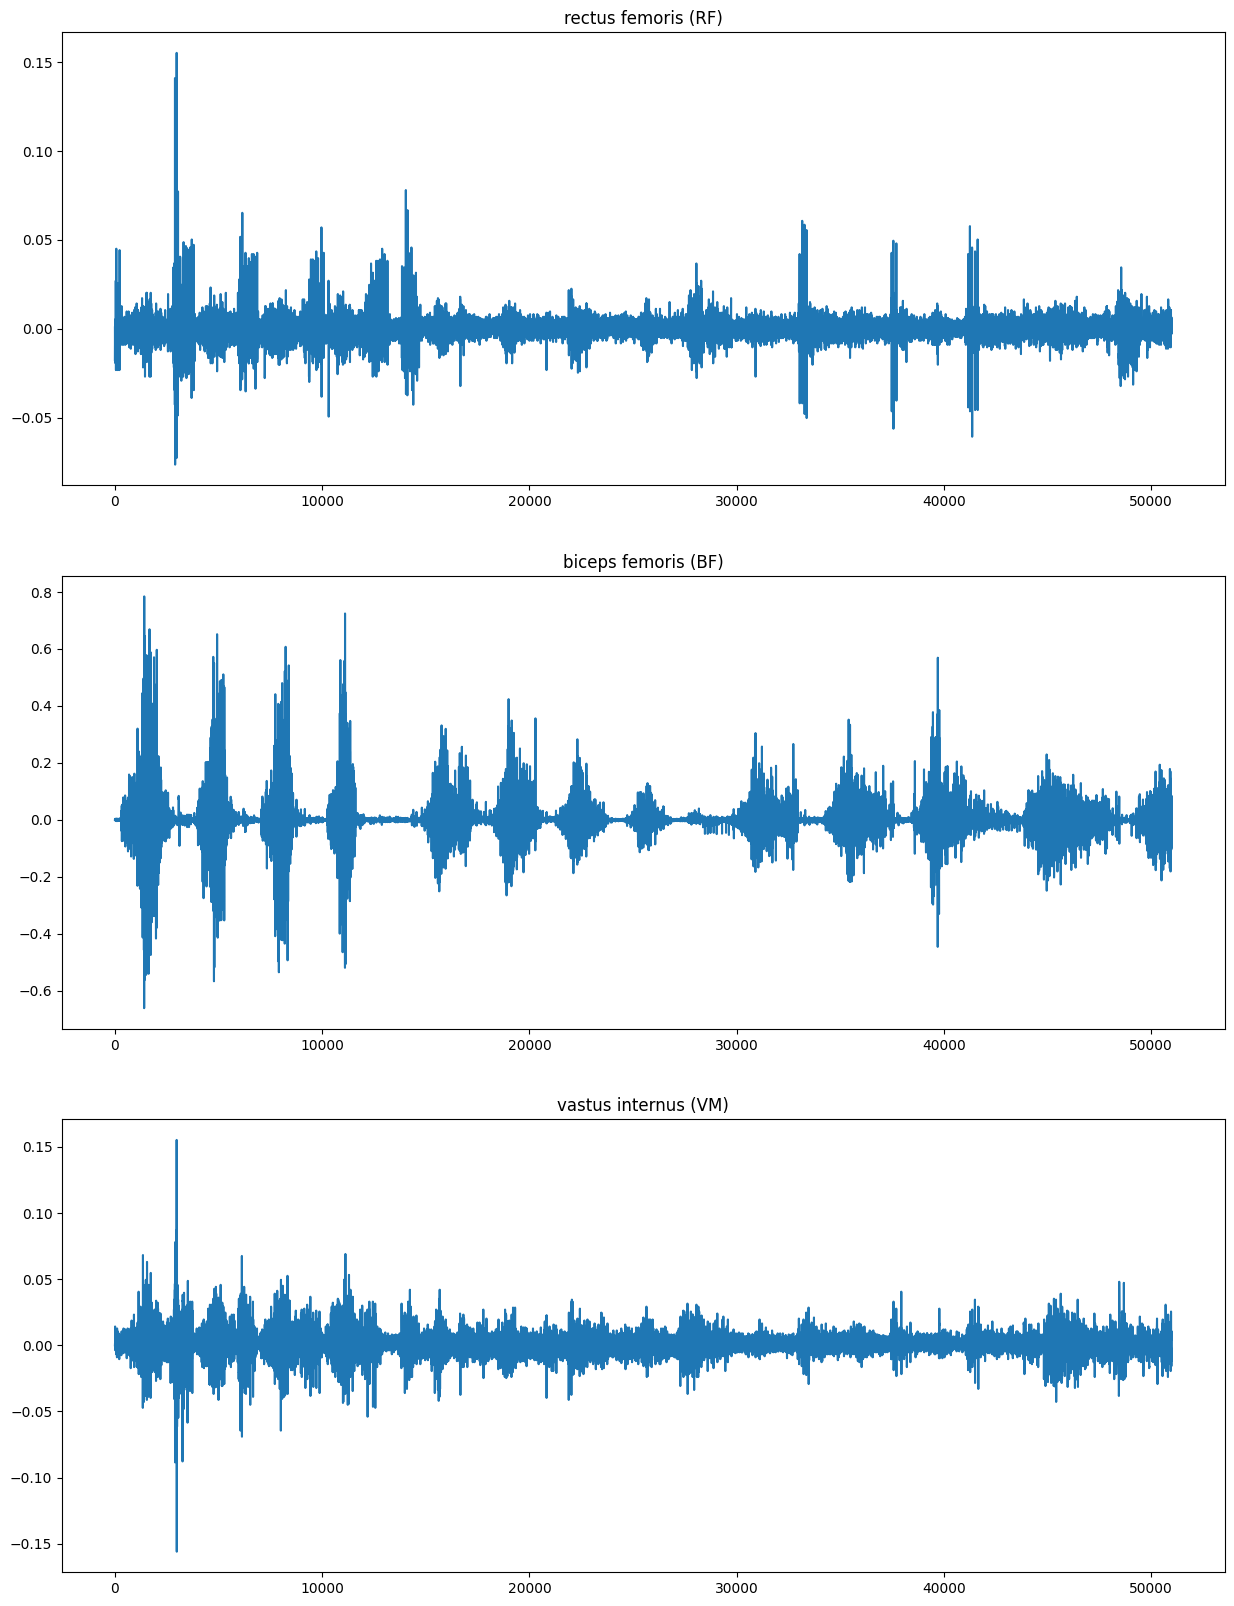

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,1, figsize=(15,20))

tdf['RF'].plot(legend=False, ax=ax[0], title='rectus femoris (RF)')
tdf['BF'].plot(legend=False, ax=ax[1], title='biceps femoris (BF)')
tdf['VM'].plot(legend=False, ax=ax[2], title='vastus internus (VM)')
plt.show()

In [16]:
from sklearn import preprocessing

def normalize(df):
  stdscaler = preprocessing.RobustScaler()
  X_scaled = stdscaler.fit_transform(df.values)
  df = pd.DataFrame(X_scaled)
  df.columns = df.columns.astype(str)

  return df

train = normalize(tdf)
test = normalize(test_df)
val = normalize(vdf)



In [17]:
import numpy as np
frames = 30 #@param {type:"slider", min:0, max:1000, step:1}

def create_sequences(values, frames=60):
    output = []
    for i in range(len(values) - frames+1):
        output.append(values[i : (i + frames)])
    return np.stack(output)


X_train = create_sequences(train.values, frames)
X_test = create_sequences(test.values, frames)
X_val = create_sequences(val.values, frames)

print(f"train {X_train.shape}")
print(f"test: {X_test.shape}")
print(f"val: {X_val.shape}")


train (50971, 30, 3)
test: (233265, 30, 3)
val: (8971, 30, 3)


In [18]:
import torch
from torch.utils.data import Dataset, TensorDataset, DataLoader

batch_size = 128
hidden_state_vector = 128
seq_len=X_train.shape[1]
in_dim=X_train.shape[2]
out_dim=X_train.shape[2]

class Data(Dataset):

    def __init__(self, x):
        self.x = x

    def __getitem__(self, idx):
        return (self.x[idx])

    def __len__(self):
        return len(self.x)

dataset = Data(
    x=torch.from_numpy(X_train).float()
)

val_dataset = Data(
    x=torch.from_numpy(X_val).float()
)

test_dataset = Data(
    x=torch.from_numpy(X_test).float()
)

train_loader = DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    num_workers=6,
    shuffle=True
)


val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    num_workers=6,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=1,
    num_workers=6,
    shuffle=False
)

print(f'Input shape: {batch_size, seq_len, in_dim}')

Input shape: (128, 30, 3)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [19]:
import os
import torch
import torch.nn as nn

from datetime import datetime
import torch
import torch.optim as optim
import torch.nn.functional as F
from torch import nn, from_numpy
from torch.autograd import Variable
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

class Net(nn.Module):

    def __init__(self,
                 hidden_vector_size,
                 seq_len,
                 in_data_dims,
                 out_data_dims,
                 dropout=0.2,
                 verbose=False):

        super(Net, self).__init__()

        self.dropout = nn.Dropout(p=dropout)
        self.seq_len = seq_len
        self.verbose = verbose

        self.encoder = nn.LSTM(input_size=in_data_dims, hidden_size=hidden_vector_size, batch_first=True)
        self.decoder = nn.LSTM(input_size=self.encoder.hidden_size, hidden_size=self.encoder.hidden_size, batch_first=False)
        self.decoder_output = nn.Linear(self.encoder.hidden_size, out_data_dims)


    def __statement(self,x):
      if self.verbose:
        print(x)

    def forward(self, x):
        # Encoder

        self.__statement(f'input_shape: {x.shape}')

        encoder_out, encoder_hidden = self.encoder(x)

        hidden_state_vector = encoder_hidden[0]
        encoder_hidden_dropout = self.dropout(hidden_state_vector)

        #classic final lSTM hidden state
        self.__statement(f'encoder hidden state: {encoder_hidden[0].shape}\n')


        # Decoder

        decoder_out, decoder_hidden = self.decoder(encoder_hidden_dropout.repeat(self.seq_len, 1, 1))

        #initalisation and decoding
        self.__statement(f'encoder hidden state repetition: {encoder_hidden_dropout.repeat(self.seq_len, 1, 1).shape}')
        self.__statement(f'decoder out: {decoder_out.shape}\n')

        decoder_output = self.decoder_output(decoder_out.transpose(0,1))

        #back to batch first and a final linear stage
        self.__statement(f'batch transpose: {decoder_out.transpose(0,1).shape}')
        self.__statement(f'linear layer output: {decoder_output.shape}\n')


        return hidden_state_vector, decoder_output

In [20]:
reset = True #@param {type:"boolean"}

if reset:
  try:
    del model

  except:
    print('model doesn\'t exist yet!')

model doesn't exist yet!


In [21]:
device = 'cuda'
model = Net(hidden_state_vector, seq_len, in_dim, out_dim, dropout=0.0, verbose=True).to(device)

In [22]:
##Run for further insight after switching to verbose

for x_batch in train_loader:
  x = x_batch.to('cuda')
  res = model(x)
  break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


input_shape: torch.Size([128, 30, 3])
encoder hidden state: torch.Size([1, 128, 128])

encoder hidden state repetition: torch.Size([30, 128, 128])
decoder out: torch.Size([30, 128, 128])

batch transpose: torch.Size([128, 30, 128])
linear layer output: torch.Size([128, 30, 3])



In [23]:
!mkdir -p /content/model
criterion = nn.MSELoss()

In [25]:
import os
import torch
import torch.nn as nn

from datetime import datetime
import torch
import torch.optim as optim
import torch.nn.functional as F
from torch import nn, from_numpy
from torch.autograd import Variable
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

device = 'cuda'
model = Net(hidden_state_vector, seq_len, in_dim, out_dim).to(device)




def val(model, val_loader, criterion):

  ##part 1 - your code here
  model.eval()
  running_vloss = 0.0
  for x_batch in val_loader:
    x = x_batch.to(device)
    x_inv = x.flip(1)
    decoder_output = model(x_inv)

    loss_decoder = criterion(decoder_output[1], x)
    loss = loss_decoder
    running_vloss += loss.item() * x.size(0)
  return running_vloss


def run(model, data_loader, val_dataset, epochs, lr = 0.01,  start_epoch=0, clipping=False, verbose = False):

  best_loss = 1e10
  train_loss = 0.0


  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(),lr=lr)

  history = dict(train=[], val=[])

  try:
    for epoch in tqdm(range(start_epoch, epochs)):
        running_loss = 0.0

        for x_batch in data_loader:
            model.train()

            x = x_batch.to(device)

            x_inv = x.flip(1) # reversed sequence

            optimizer.zero_grad()
            decoder_output= model(x_inv)

            loss_decoder = criterion(decoder_output[1], x)
            loss = loss_decoder
            running_loss+=loss.item() * x.size(0)

            loss.backward()

            if clipping:
              torch.nn.utils.clip_grad_norm_(model.parameters(), 1.5)

            optimizer.step()



        running_val = val(model, val_loader, criterion)
        train_loss = running_loss / len(train_loader.sampler)
        val_loss = running_val / len(val_loader.sampler)

        if train_loss < best_loss:
          best_loss = train_loss
          torch.save(model.state_dict(),'/content/model/check.pth')


        ###end part 2###
        if verbose:
          print(f"Epoch {epoch}: Train loss: {train_loss:.6f}, Val loss: {val_loss:.6f}")

        if epoch > 0:
          history['train'].append(train_loss)
          history['val'].append(val_loss)

  except KeyboardInterrupt:
    return history


  return history


In [26]:
from tqdm.notebook import tqdm
history = run(model, train_loader,val_loader, 150, lr=0.001, clipping=True, verbose=True)

  0%|          | 0/150 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 0: Train loss: 2.912401, Val loss: 1.137272
Epoch 1: Train loss: 2.345827, Val loss: 1.083170
Epoch 2: Train loss: 2.101339, Val loss: 1.007154
Epoch 3: Train loss: 1.854167, Val loss: 0.868215
Epoch 4: Train loss: 1.695592, Val loss: 0.798656
Epoch 5: Train loss: 1.546103, Val loss: 0.721430
Epoch 6: Train loss: 1.443107, Val loss: 0.681683
Epoch 7: Train loss: 1.332308, Val loss: 0.638554
Epoch 8: Train loss: 1.223691, Val loss: 0.594995
Epoch 9: Train loss: 1.163626, Val loss: 0.551459
Epoch 10: Train loss: 1.066561, Val loss: 0.520679
Epoch 11: Train loss: 1.014278, Val loss: 0.496740
Epoch 12: Train loss: 0.953555, Val loss: 0.453135
Epoch 13: Train loss: 0.898611, Val loss: 0.437642
Epoch 14: Train loss: 0.857874, Val loss: 0.416563
Epoch 15: Train loss: 0.830831, Val loss: 0.404238
Epoch 16: Train loss: 0.791865, Val loss: 0.382873
Epoch 17: Train loss: 0.761649, Val loss: 0.378805
Epoch 18: Train loss: 0.730996, Val loss: 0.380038
Epoch 19: Train loss: 0.707445, Val loss:

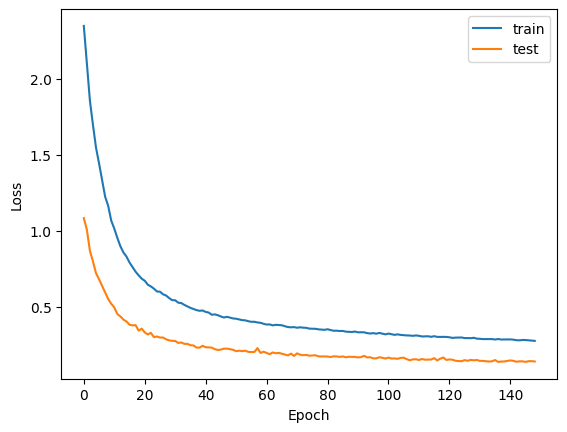

In [27]:
ax = plt.figure().gca()

ax.plot(history['train'])
ax.plot(history['val'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show();

In [28]:
model = Net(hidden_state_vector, seq_len, in_dim, out_dim).to(device)
model.load_state_dict(torch.load('/content/model/check.pth'))
model.eval()

Net(
  (dropout): Dropout(p=0.2, inplace=False)
  (encoder): LSTM(3, 128, batch_first=True)
  (decoder): LSTM(128, 128)
  (decoder_output): Linear(in_features=128, out_features=3, bias=True)
)

In [29]:
def batch_predict(loader):
  losses = []
  res = []
  with torch.no_grad():
     model.eval()
     for x_batch in loader:
      x = x_batch.to(device)
      x_inv = x.flip(1)
      decoder_output = model(x_inv)
      loss_decoder = criterion(decoder_output[1], x)
      losses.append(loss_decoder.item())
      res.append(decoder_output[1].cpu().numpy())
  return np.concatenate(res), losses

In [30]:
def grab_anomalies(loader, std_threshold=2, threshold=0, train=False, max=False):


  out,losses = batch_predict(loader)



  score_df = pd.DataFrame()
  score_df['loss'] = losses


  if threshold==0:
    threshold = np.mean(score_df.loss) + std_threshold*np.std(score_df.loss)
    max_thresh = score_df.loss.max()
    train = True

  if max:
    threshold=max_thresh
  else:
    threshold=threshold

  score_df['threshold']=threshold
  score_df['anomalies'] = score_df['loss'] > threshold
  flagged = score_df[score_df['anomalies']==True]
  fcoords = [(index, row.loss) for index,row in flagged.iterrows()]

  print(f'{np.sum(score_df.anomalies)} anomalies\n')


  if train:
    print(f'threshold: {threshold}, dist max: {score_df.loss.max()}')
    return score_df, out, fcoords, threshold

  else:
    print(f'using train threshold at: {threshold}')
    return score_df, out, fcoords

In [31]:
train_loader = DataLoader(
    dataset=dataset,
    batch_size=128,
    num_workers=6,
    shuffle=False
)


train_df, X_pred, fcoords, threshold = grab_anomalies(train_loader, max=True)

0 anomalies

threshold: 1.1285535097122192, dist max: 1.1285535097122192


In [32]:
train_df

,loss,threshold,anomalies
0,0.056825,1.128554,False
1,0.040160,1.128554,False
2,0.060956,1.128554,False
3,0.066437,1.128554,False
4,0.081066,1.128554,False
...,...,...,...
394,0.217929,1.128554,False
395,0.231769,1.128554,False
396,0.179876,1.128554,False
397,0.196932,1.128554,False


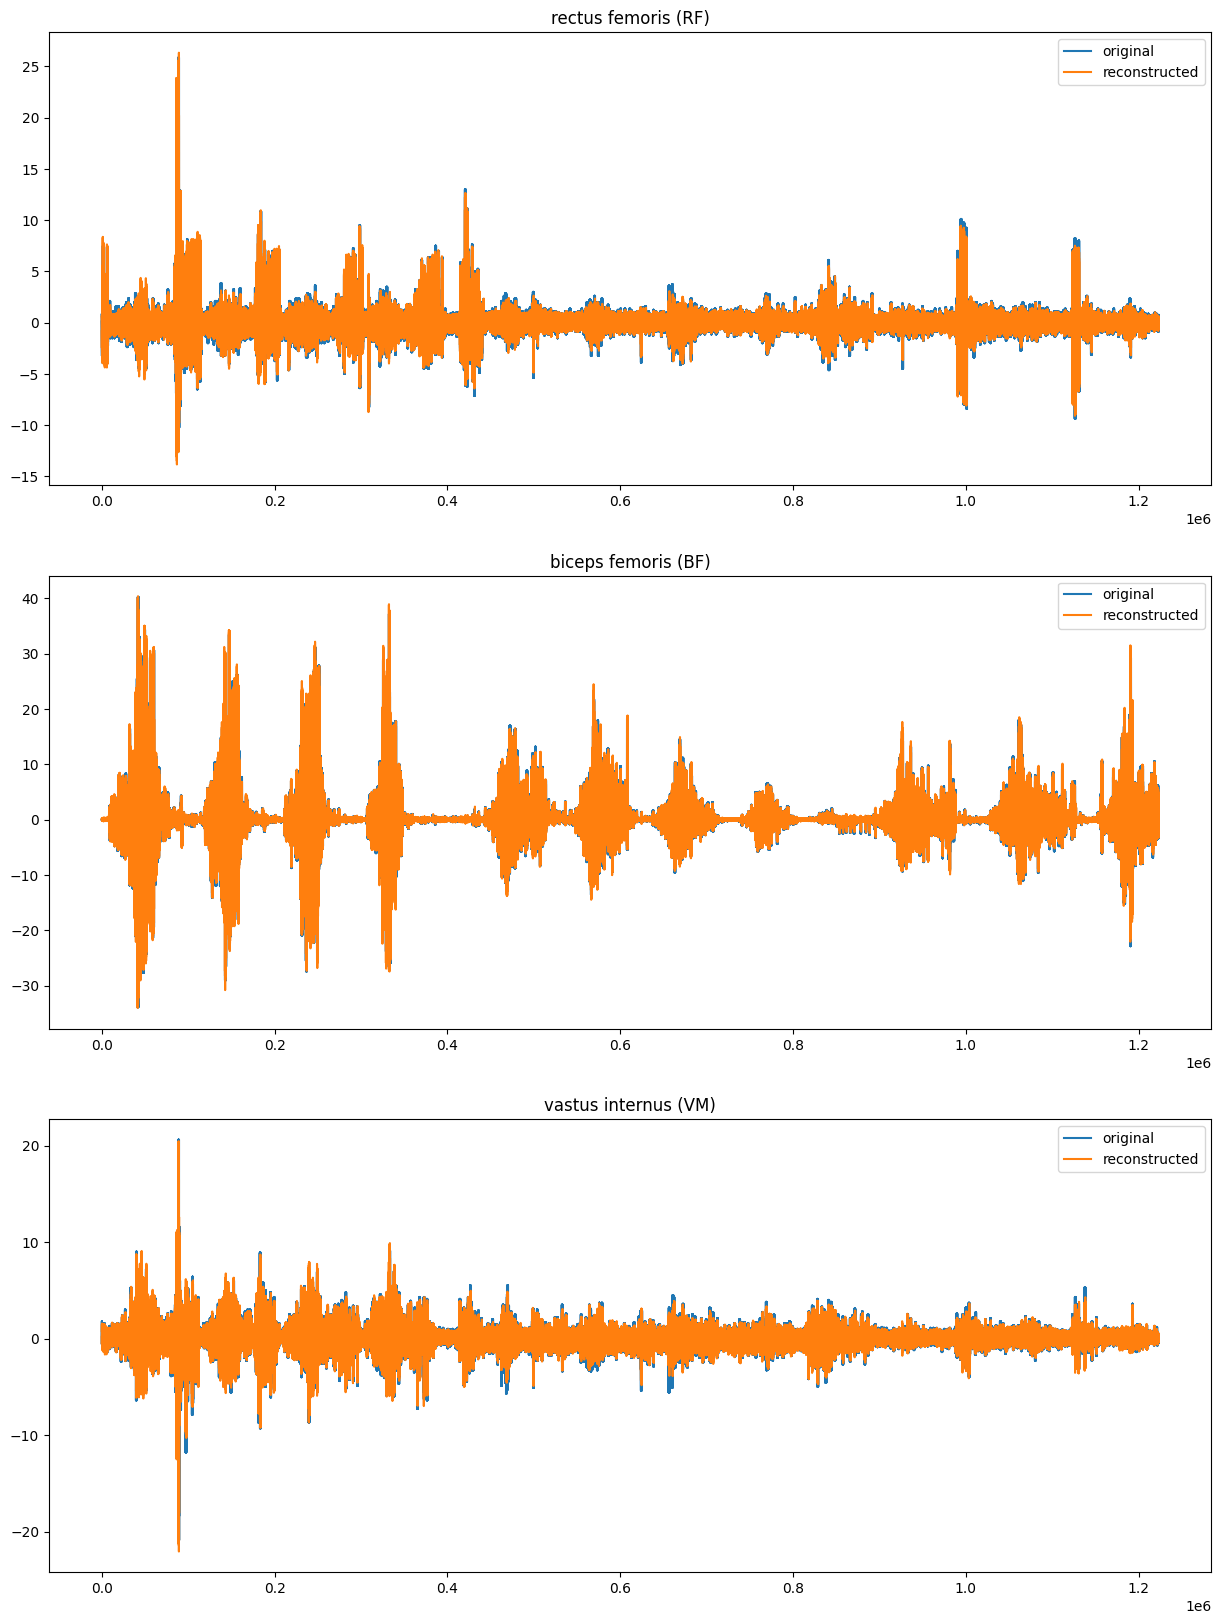

In [33]:
def viz_reconstructed(X, pred, percentage=0.80):


  fig, axes = plt.subplots(3,1, figsize = (15,20))
  title_dict = {0:'rectus femoris (RF)', 1:'biceps femoris (BF)', 2:'vastus internus (VM)'}

  for num, ax in enumerate(axes):

    test = np.concatenate([X[i][:, num] for i in range(int(len(X)*percentage))])
    target = np.concatenate([pred[i][:, num] for i in range(int(len(pred)*percentage))])

    ax.plot(test, label = 'original')
    ax.plot(target, label='reconstructed')
    ax.title.set_text(title_dict[num])
    ax.legend(loc="upper right")


  plt.show()

viz_reconstructed(X_train, X_pred)

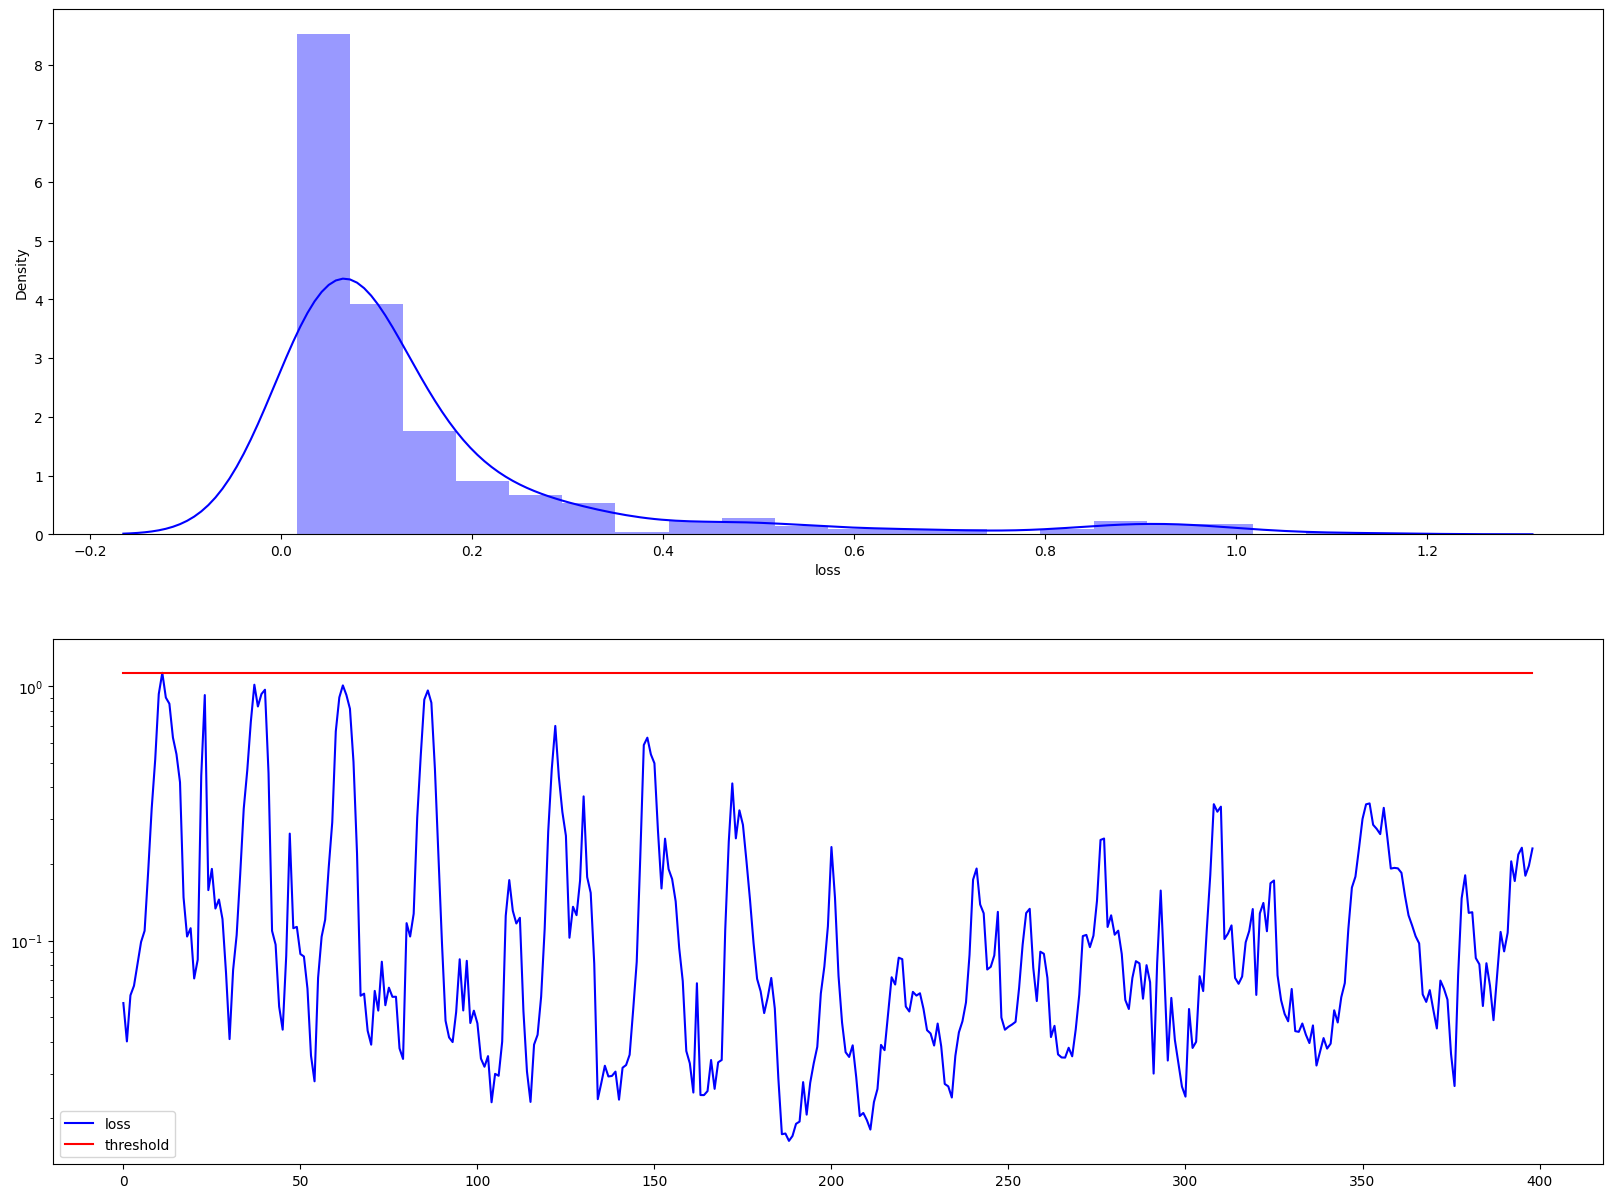

In [34]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def viz_losses(df, pad=0.4, bins=20):

  ymin = df['loss'].min()
  ymax = df['loss'].max()

  fig, axes = plt.subplots(2,1)

  sns.distplot(df['loss'], bins = bins, kde= True, color = 'blue', ax=axes[0])
  df.plot(logy=True, ylim=[ymin - pad,ymax + pad], figsize=(20,15), color=['blue','red'], ax=axes[1])


viz_losses(train_df)

In [35]:
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=128,
    num_workers=6,
    shuffle=False
)


test_df, X_pred, fcoords = grab_anomalies(test_loader, threshold=threshold)

475 anomalies

using train threshold at: 1.1285535097122192


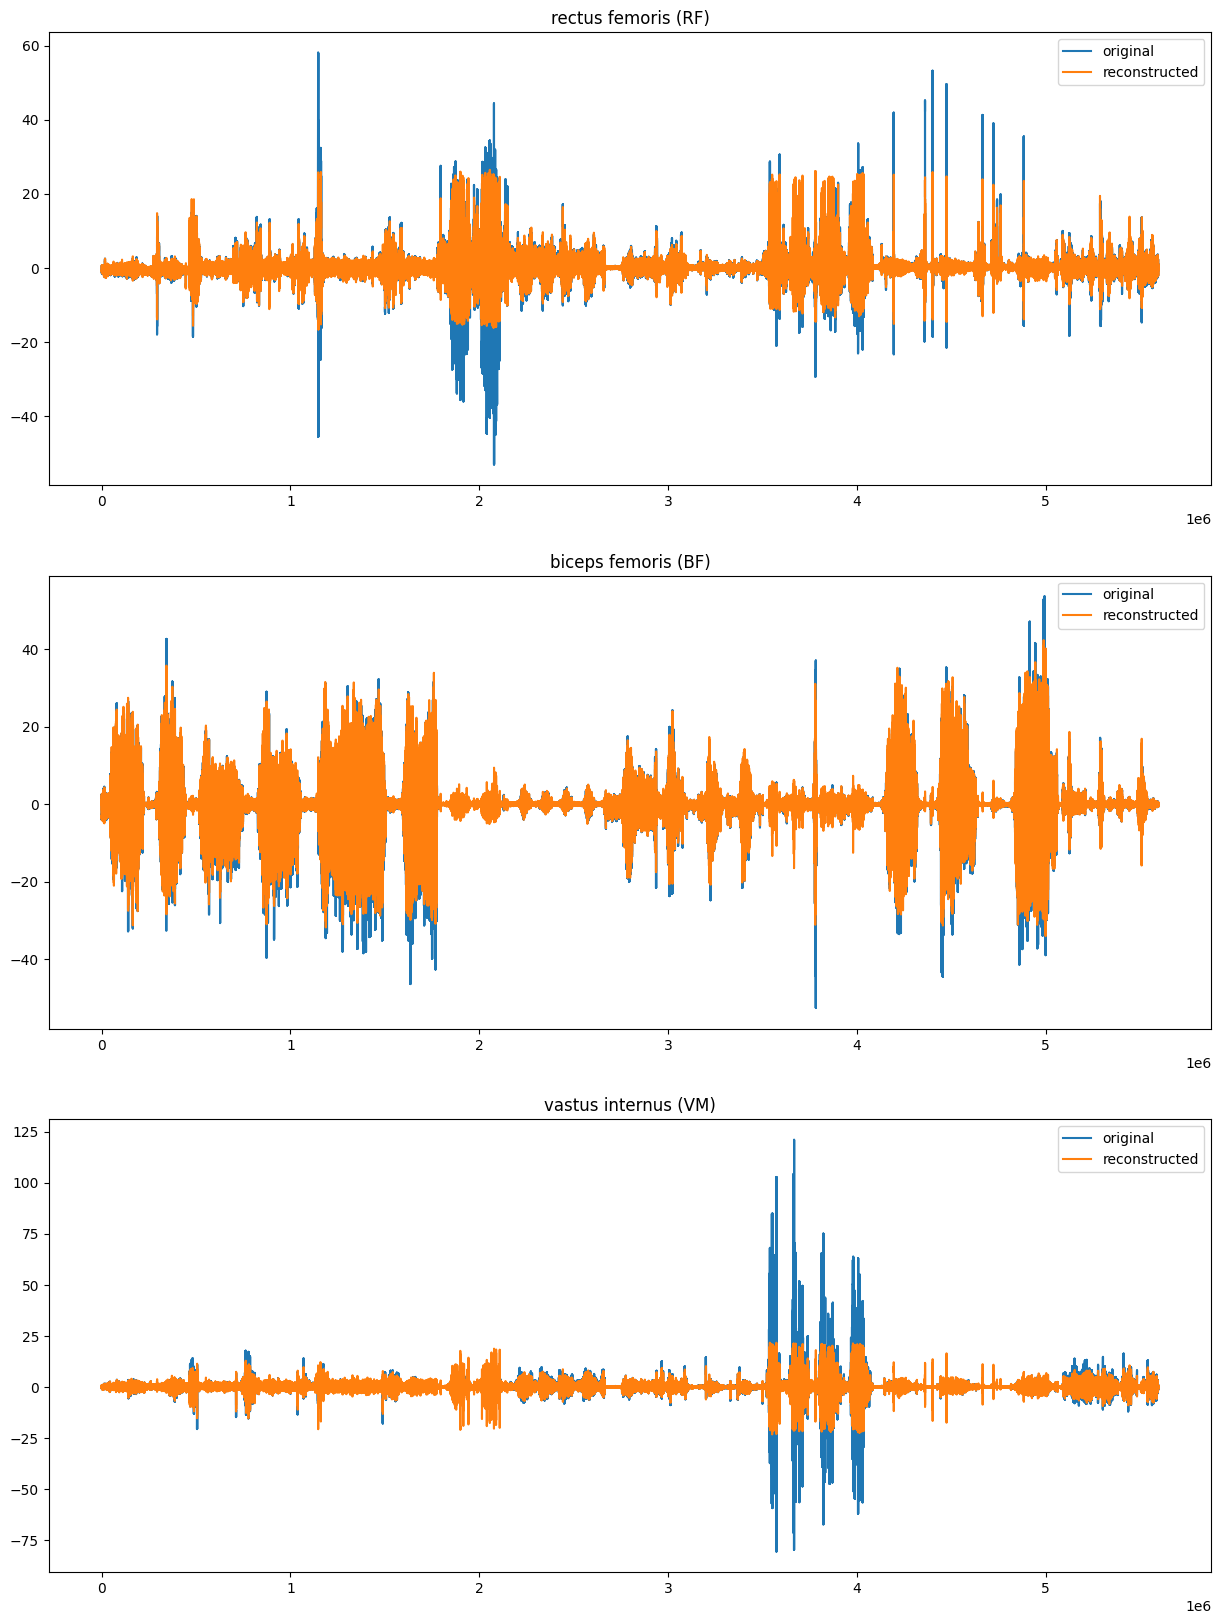

In [36]:
viz_reconstructed(X_test, X_pred)


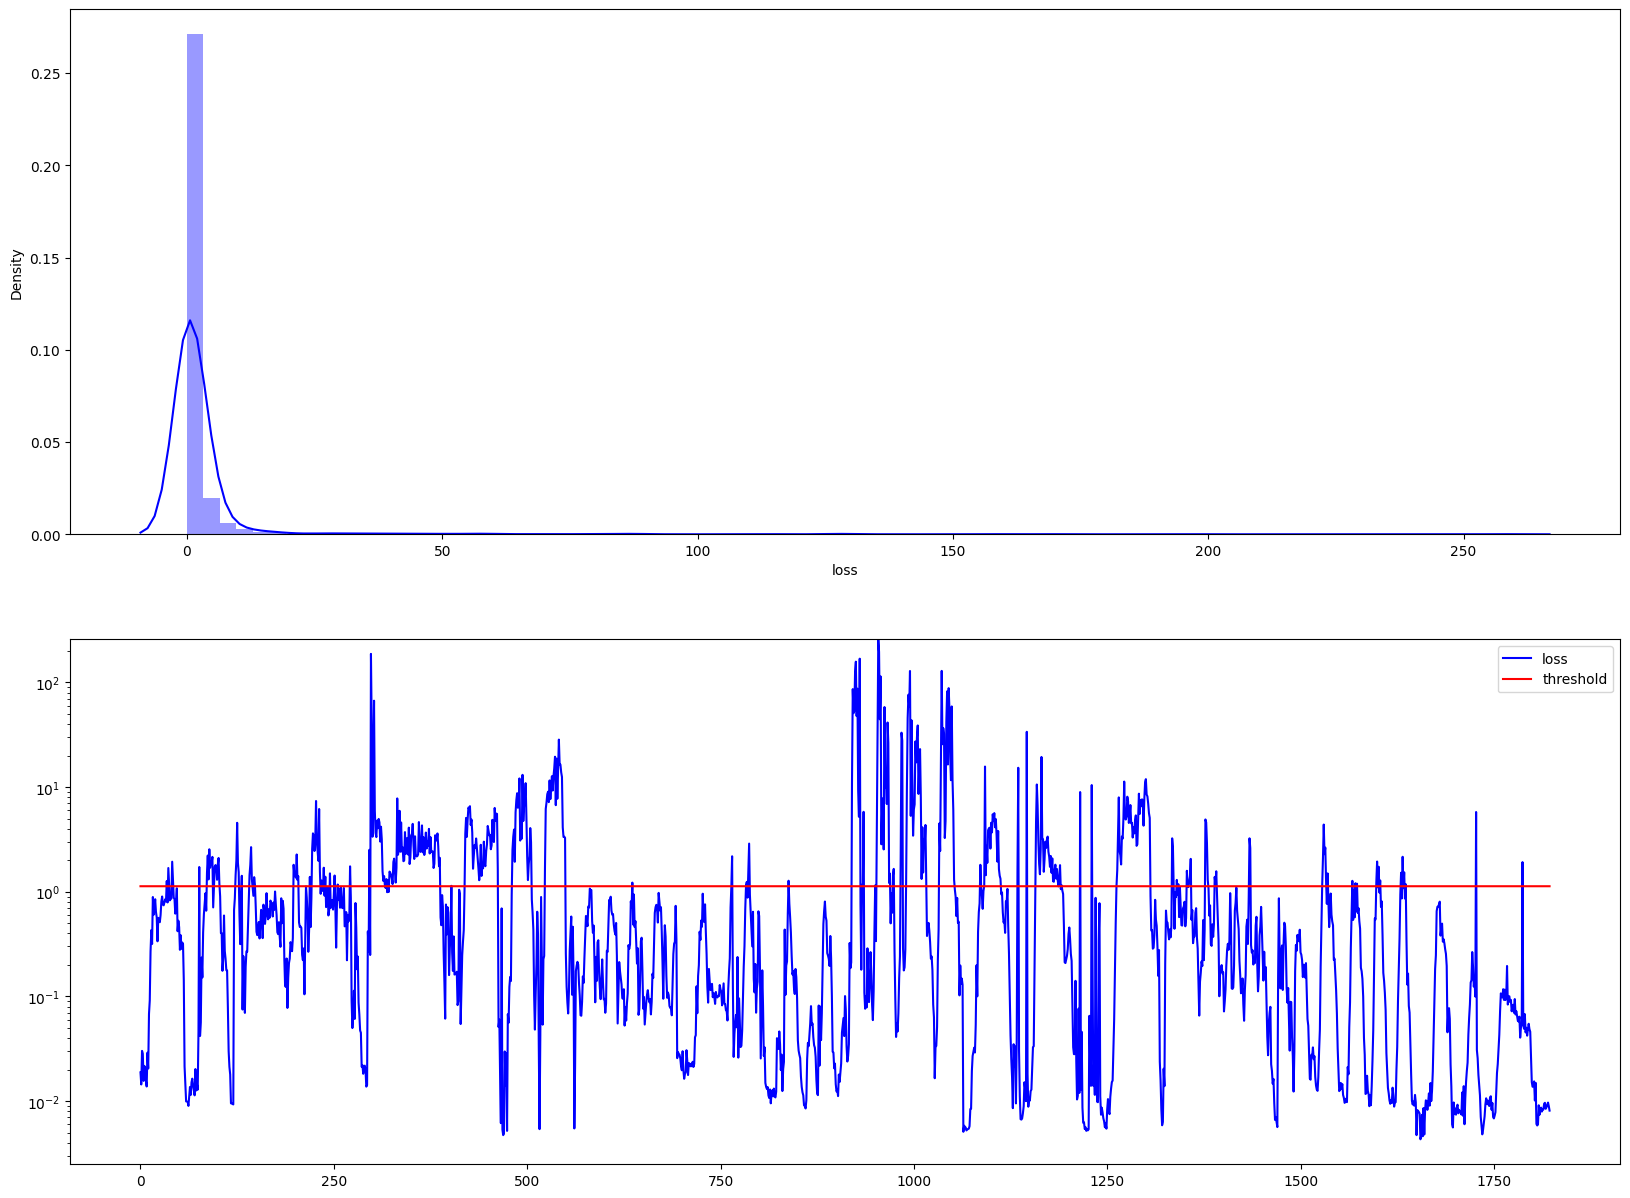

In [37]:
viz_losses(test_df, bins=80)